In [8]:
from tensorflow.keras import layers, Model
import tensorflow
import os

In [9]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# weights of InceptionV3 
model_weights_file = '/Users/Oliver/Kaggle/cv/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# define model without the toplest layer, which outputs depends on the number of classification
pre_trained_model = InceptionV3(
        input_shape=(150, 150, 3),
        include_top=False,
        weights=None)

pre_trained_model.load_weights(model_weights_file)

# keep other layers unchanged in the InceptionV3 
for layer in pre_trained_model.layers:
    layer.trainable = False

# pre_trained_model.summary()

# the task is a simple binary classification , so only take parts of inceptionv3
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [3]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=pre_trained_model.input, outputs = x)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [4]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = 'data'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

# centrolization and augmentaiton
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
        train_dir,
        batch_size=20,
        class_mode='binary',
        target_size=(150, 150))

val_gen = train_datagen.flow_from_directory(
        val_dir,
        batch_size=20,
        class_mode='binary',
        target_size=(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,min_delta=1e-3)]
history = model.fit(
        train_gen,
        steps_per_epoch=100,
        epochs=20,
        validation_data=val_gen,
        validation_steps=50,
        callback=callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/20
100/100 [==============================] - 48s 484ms/step - loss: 0.6213 - accuracy: 0.7705 - val_loss: 0.2860 - val_accuracy: 0.9110
Epoch 2/20
100/100 [==============================] - 44s 438ms/step - loss: 0.3629 - accuracy: 0.8370 - val_loss: 0.2413 - val_accuracy: 0.9200
Epoch 3/20
100/100 [==============================] - 44s 438ms/step - loss: 0.3453 - accuracy: 0.8470 - val_loss: 0.3322 - val_accuracy: 0.9170
Epoch 4/20
100/100 [==============================] - 43s 435ms/step - loss: 0.3156 - accuracy: 0.8685 - val_loss: 0.3899 - val_accuracy: 0.9080
Epoch 5/20
100/100 [==============================] - 44s 438ms/step - loss: 0.3012 - accuracy: 0.8695 - val_loss: 0.5291 - val_accuracy: 0.8720
Epoch 6/20
100/100 [==============================] - 44s 436ms/step - loss: 0.2655 - accuracy: 0.8830 - val_loss: 0.3022 - val_accuracy: 0.9230
Epoch 7/20
100/100 [=================

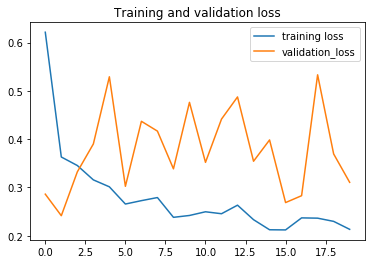

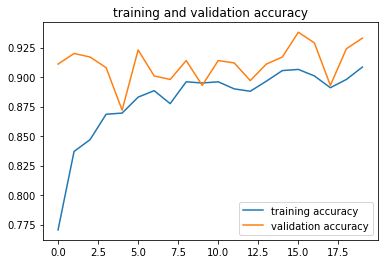

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(loss, label='training loss')
plt.plot(val_loss, label='validation_loss')
plt.title('Training and validation loss')
plt.legend()


plt.figure()
plt.plot(acc, label='training accuracy')
plt.plot(val_acc, label='validation accuracy')
plt.title('training and validation accuracy')
plt.legend()

plt.show()

In [7]:
model.save('new_model.h5')